# Weighted Collaborative Recommendations

<img src="Recommendation_Criteria_AvG.png">

Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

raw_credits = pd.read_csv("tmdb_5000_credits.csv")
raw_movies  = pd.read_csv("tmdb_5000_movies.csv")

credits = raw_credits.rename(index=str, columns={"movie_id": "id"})
df      = raw_movies.merge(credits, on='id')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Compute components of the Weighted Formula

In [2]:
v = df['vote_count']
R = df['vote_average']
C = df['vote_average'].mean()
m = df['vote_count'].quantile(0.80)

df['weighted_average'] = ((R*v)+ (C*m))/(v+m)

In [3]:
df.groupby('original_title')['weighted_average'].mean().sort_values(ascending = False).head(10)

original_title
The Shawshank Redemption    8.248353
Fight Club                  8.096134
The Godfather               8.077404
Pulp Fiction                8.074738
The Dark Knight             8.044250
Forrest Gump                7.972814
Inception                   7.969290
Interstellar                7.937399
The Empire Strikes Back     7.904757
Schindler's List            7.900080
Name: weighted_average, dtype: float64

In [4]:
df_sorted_weighted = df.sort_values('weighted_average', ascending = False)
df_sorted_weighted[['original_title', 'vote_count', 'vote_average', 'weighted_average']].head(10)

,original_title,vote_count,vote_average,weighted_average
1881,The Shawshank Redemption,8205,8.5,8.248353
662,Fight Club,9413,8.3,8.096134
3337,The Godfather,5893,8.4,8.077404
3232,Pulp Fiction,8428,8.3,8.074738
65,The Dark Knight,12002,8.2,8.044250
809,Forrest Gump,7927,8.2,7.972814
96,Inception,13752,8.1,7.969290
95,Interstellar,10867,8.1,7.937399
1990,The Empire Strikes Back,5879,8.2,7.904757
1818,Schindler's List,4329,8.3,7.900080


### Recommendations based on Weighted Score

Text(0, 0.5, 'Movie Title')

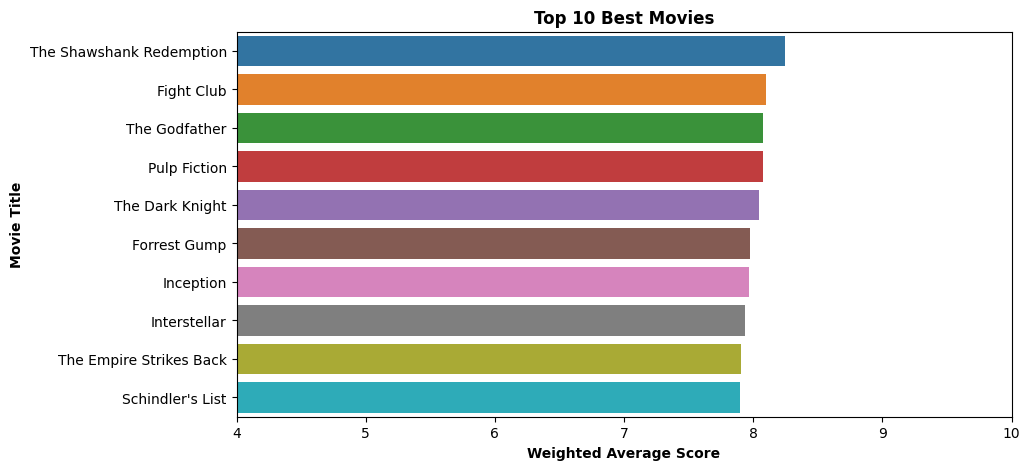

In [5]:
plt.figure(figsize=(10,5))
axis1 = sns.barplot(x = df_sorted_weighted['weighted_average'].head(10), 
                    y = df_sorted_weighted['original_title'].head(10), 
                    data = df_sorted_weighted)

plt.xlim(4, 10)
plt.title('Top 10 Best Movies', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

### Recommendations based on Popularity

Text(0, 0.5, 'Movie Title')

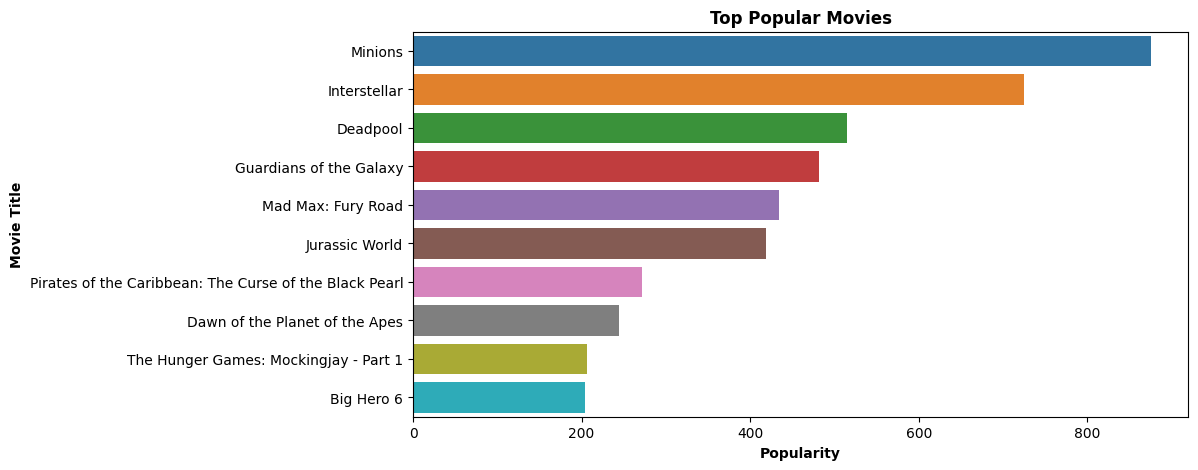

In [6]:
df_sorted_popularity = df.sort_values('popularity',ascending=False)

plt.figure(figsize=(10,5))
axis1 = sns.barplot(x = df_sorted_popularity['popularity'].head(10), 
                    y = df_sorted_popularity['original_title'].head(10), 
                    data = df_sorted_popularity)

plt.title('Top Popular Movies', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

### Recommendations based on Scaled weighted average and Scaled Popularity 

In [7]:
from sklearn.preprocessing import MinMaxScaler

mmx_scaler = MinMaxScaler()

scaled_df  = pd.DataFrame(mmx_scaler.fit_transform(df[['weighted_average','popularity']]), columns = ['weighted_average','popularity'])

scaled_df.head()

,weighted_average,popularity
0,0.661988,0.171815
1,0.554869,0.158846
2,0.407013,0.122635
3,0.763459,0.128272
4,0.357503,0.050169


In [8]:
df[['MinMax_weight_average','MinMax_popularity']] = scaled_df


In [9]:
importance_weight = 0.5

In [10]:
df['score'] = (df['MinMax_weight_average'] * importance_weight) + (df['MinMax_popularity'] * importance_weight)

df = df.sort_values(['score'], ascending=False)
df[['original_title', 'MinMax_weight_average', 'MinMax_popularity', 'score']].head(10)

,original_title,MinMax_weight_average,MinMax_popularity,score
95,Interstellar,0.907110,0.827162,0.867136
546,Minions,0.431920,1.000000,0.715960
94,Guardians of the Galaxy,0.847604,0.549462,0.698533
788,Deadpool,0.715274,0.587690,0.651482
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.939029,0.213941,0.576485
127,Mad Max: Fury Road,0.656312,0.495989,0.576150
662,Fight Club,0.954528,0.167611,0.561070
3865,Whiplash,0.894242,0.219887,0.557065
3337,The Godfather,0.948933,0.164074,0.556503
